In [61]:
import pandas as pd
import numpy as np

df = pd.read_csv("mirrorPublications_featured_final.csv")

#codifico topics in one-hot encoding
one_hot_encoded_topics = pd.get_dummies(df['topic'], prefix='topic')
#trasformo i valori True e False in 0 e 1
one_hot_encoded_topics = one_hot_encoded_topics.astype(int)
#concatenazione i risultati con il df originale
df = pd.concat([df, one_hot_encoded_topics], axis=1)

df.loc[:, 'Price(ETH)'] = df['Price(ETH)'].replace(0, 0.0001)
df.loc[:, 'Success'] = (df['Total Sold Numbers'] * df['Price(ETH)']) * 100000 / (df['Total Buyers'] + 1)

threshold = df['Success'].median()  # Soglia basata sulla mediana

# Creazione della colonna SuccessBinary
df['SuccessBinary'] = np.where(df['Success'] >= threshold, 1, 0)

counts = df['SuccessBinary'].value_counts()
counts

SuccessBinary
1    13710
0    13169
Name: count, dtype: int64

In [62]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Esempio: Preprocessing dei dati
# Separa il tuo dataframe in variabili di input (X) e target (y)
X = df.drop(columns=['Writing NFT', 'Author Homepage', 'Total Sold(ETH)', 'Total Sold Numbers', 'Total Buyers',
    'Price(ETH)', 'nft_address', 'collection', 'fees', 'created_date', 'link', 'digest', 'body', 'timestamp', 'title', 'cleaned_text', 
    'cleaned_body', 'cleaned_title', 'processed_cleaned_text', 'weekday', 'language',
    'cleaned_text_tokenized', 'cleaned_text_lemmatized', 'cleaned_text_POS', "topic",
    'transaction_id', 'Success', 'SuccessBinary'])
y = df['SuccessBinary']

# Suddividi in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Applica imputazione per i valori NaN
imputer = SimpleImputer(strategy='mean')  # Puoi cambiare la strategia (media, mediana, costante, ecc.)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardizza i dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [63]:
features_used = X.columns.tolist()
features_used

['year',
 'month',
 'day',
 'cleaned_text_sentiment',
 'words_body',
 'words_title',
 'words_text',
 'normalized_tfidf_sum',
 'nft',
 'web3',
 'community',
 'blockchain',
 'crypto',
 'wallet',
 'chain',
 'verbs_density',
 'adjectives_density',
 'nouns_density',
 'Kincaid',
 'FleschReadingEase',
 'GunningFogIndex',
 'characters_per_word',
 'syll_per_word',
 'words_per_sentence',
 'sentences_per_paragraph',
 'type_token_ratio',
 'characters',
 'syllables',
 'words',
 'wordtypes',
 'sentences',
 'paragraphs',
 'long_words',
 'complex_words',
 'topic_T1: Gaming, Virtual Worlds & Characters',
 'topic_T2: Wallets, Airdrops & Ethereum Tools',
 'topic_T3: Web3, Blockchain & Digital Platforms',
 'topic_T4: DeFi, Market Strategies & Liquidity',
 'topic_T5: Blockchain, Transactions & Smart Contracts',
 'topic_T6: Web3 Launches, Rewards & Creators',
 'topic_T7: Human Thoughts, Emotions & Reflections']

In [64]:
dict_0 = df.iloc[0].to_dict()
for k in dict_0:
    print(k)

Writing NFT
Author Homepage
Total Sold(ETH)
Total Sold Numbers
Total Buyers
Price(ETH)
nft_address
collection
fees
created_date
link
digest
transaction_id
body
timestamp
title
year
month
day
weekday
cleaned_text
language
cleaned_body
cleaned_title
processed_cleaned_text
cleaned_text_tokenized
cleaned_text_lemmatized
cleaned_text_POS
cleaned_text_sentiment
words_body
words_title
words_text
normalized_tfidf_sum
topic
nft
web3
community
blockchain
crypto
wallet
chain
verbs_density
adjectives_density
nouns_density
Kincaid
FleschReadingEase
GunningFogIndex
characters_per_word
syll_per_word
words_per_sentence
sentences_per_paragraph
type_token_ratio
characters
syllables
words
wordtypes
sentences
paragraphs
long_words
complex_words
topic_T1: Gaming, Virtual Worlds & Characters
topic_T2: Wallets, Airdrops & Ethereum Tools
topic_T3: Web3, Blockchain & Digital Platforms
topic_T4: DeFi, Market Strategies & Liquidity
topic_T5: Blockchain, Transactions & Smart Contracts
topic_T6: Web3 Launches, Rew

In [65]:
df.iloc[0]['timestamp']

1706545273.0

In [66]:
df.iloc[0]['created_date']

'2024-01-29'

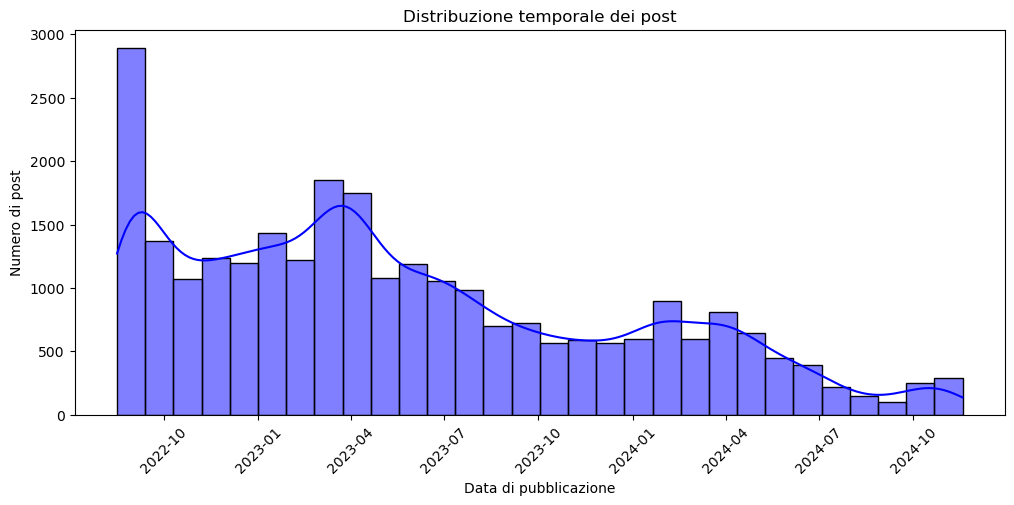

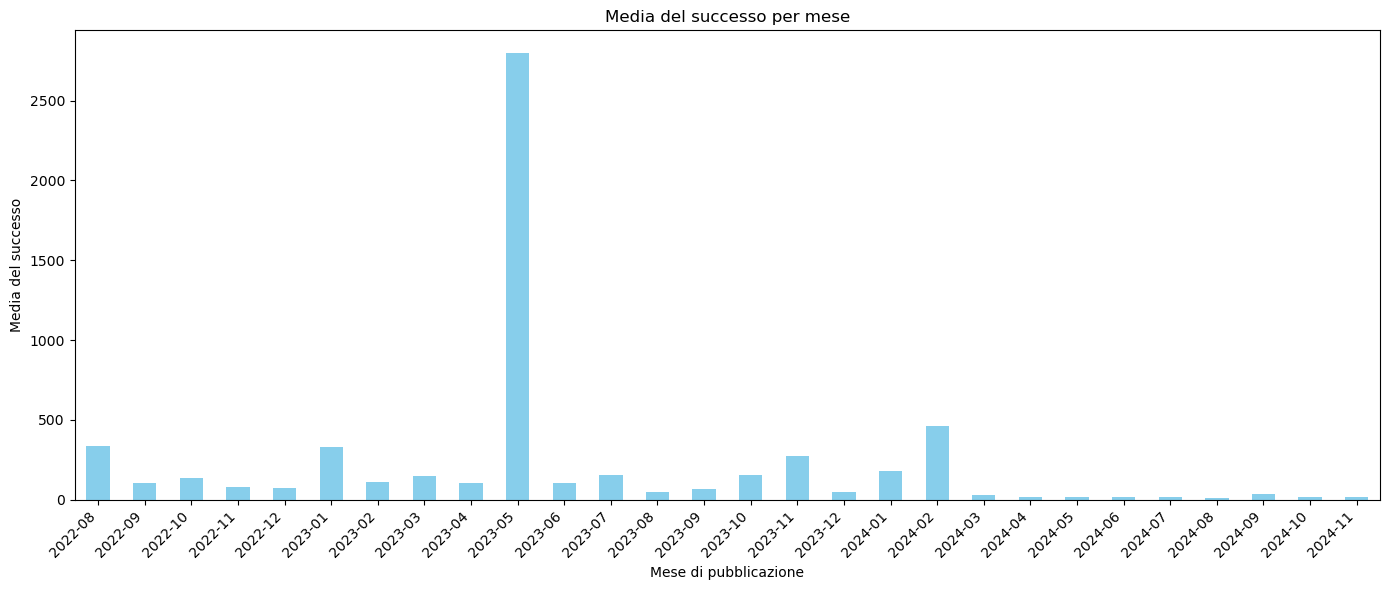

<Figure size 1400x600 with 0 Axes>

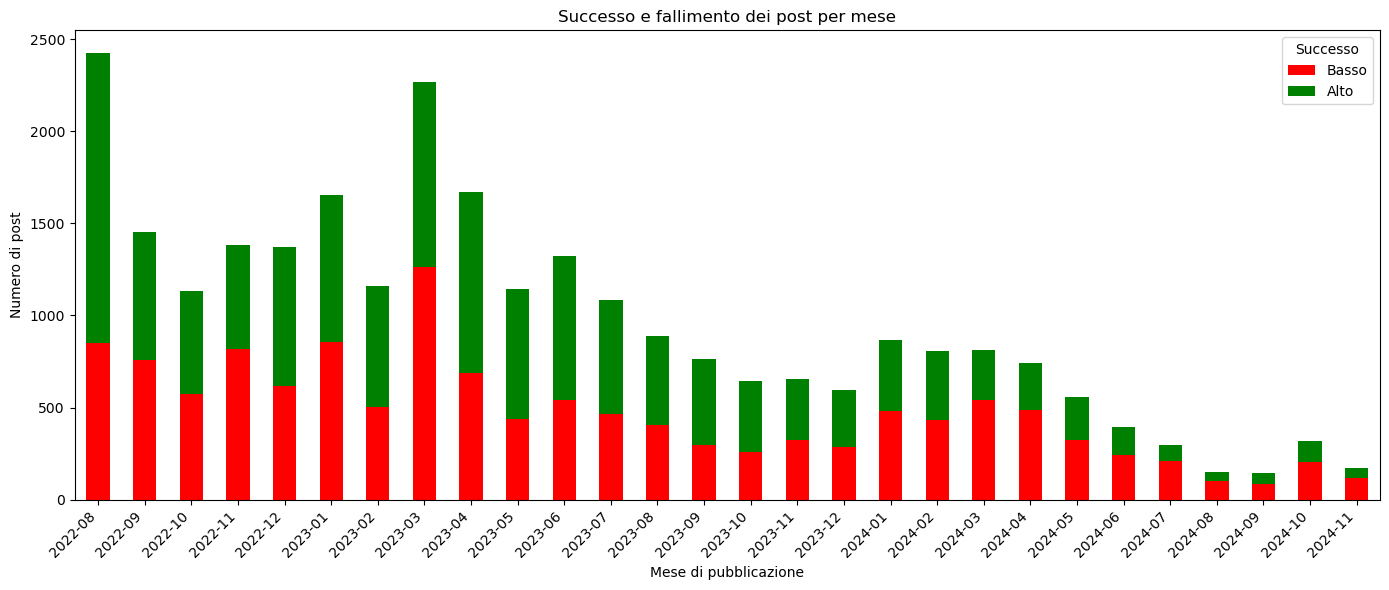


Media del successo per mese:
year_month
2022-08     339.230777
2022-09     106.724958
2022-10     135.250194
2022-11      77.904315
2022-12      70.739381
2023-01     332.538697
2023-02     112.601087
2023-03     146.728217
2023-04     102.836355
2023-05    2800.389852
2023-06     102.262513
2023-07     152.528575
2023-08      46.654567
2023-09      67.087369
2023-10     156.212960
2023-11     275.017062
2023-12      46.486009
2024-01     178.953189
2024-02     459.999902
2024-03      32.126748
2024-04      14.979910
2024-05      14.411784
2024-06      19.917212
2024-07      15.730425
2024-08      10.594086
2024-09      32.903150
2024-10      16.880789
2024-11      15.013324
Freq: M, Name: Success, dtype: float64


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creiamo una nuova colonna 'publication_date' scegliendo la data più affidabile
df['publication_date'] = pd.to_datetime(df['created_date'], errors='coerce')  # Prima proviamo con created_date
df.loc[df['publication_date'].isna(), 'publication_date'] = pd.to_datetime(df['timestamp'], unit='s')

# Ordiniamo per data
df = df.sort_values(by='publication_date')

# Creiamo il grafico della distribuzione dei post nel tempo
plt.figure(figsize=(12, 5))
sns.histplot(df['publication_date'], bins=30, kde=True, color='blue')
plt.xlabel("Data di pubblicazione")
plt.ylabel("Numero di post")
plt.title("Distribuzione temporale dei post")
plt.xticks(rotation=45)
plt.show()

# Grafico a barre per il successo medio mensile
success_per_month = df.groupby(df['publication_date'].dt.to_period('M'))['Success'].mean()
plt.figure(figsize=(14, 6))
success_per_month.plot(kind='bar', color='skyblue')
plt.xlabel("Mese di pubblicazione")
plt.ylabel("Media del successo")
plt.title("Media del successo per mese")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Raggruppiamo i dati per mese e per successo binario
grouped = df.groupby([df['publication_date'].dt.to_period('M'), 'SuccessBinary']).size().unstack(fill_value=0)

# Creiamo il grafico a barre impilate
plt.figure(figsize=(14, 6))
grouped.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(14, 6))
plt.xlabel("Mese di pubblicazione")
plt.ylabel("Numero di post")
plt.title("Successo e fallimento dei post per mese")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Successo", labels=["Basso", "Alto"])
plt.tight_layout()
plt.show()

# Analisi testuale: vediamo il numero di post per mese
df['year_month'] = df['publication_date'].dt.to_period('M')
success_per_month = df.groupby('year_month')['Success'].mean()

print("\nMedia del successo per mese:")
print(success_per_month)

In [82]:
#vediamo perché la media del successo a maggio 2023 è così alta
maggio_2023 = df[df['year_month'] == pd.Period('2023-05')]

maggio_2023_sorted = maggio_2023.sort_values(by='Success', ascending=False)

top_n = 10
maggio_2023_sorted.head(top_n)

,Writing NFT,Author Homepage,Total Sold(ETH),Total Sold Numbers,Total Buyers,Price(ETH),nft_address,collection,fees,created_date,link,digest,transaction_id,body,timestamp,title,year,month,day,weekday,cleaned_text,language,cleaned_body,cleaned_title,processed_cleaned_text,cleaned_text_tokenized,cleaned_text_lemmatized,cleaned_text_POS,cleaned_text_sentiment,words_body,words_title,words_text,normalized_tfidf_sum,topic,nft,web3,community,blockchain,crypto,wallet,chain,verbs_density,adjectives_density,nouns_density,Kincaid,FleschReadingEase,GunningFogIndex,characters_per_word,syll_per_word,words_per_sentence,sentences_per_paragraph,type_token_ratio,characters,syllables,words,wordtypes,sentences,paragraphs,long_words,complex_words,"topic_T1: Gaming, Virtual Worlds & Characters","topic_T2: Wallets, Airdrops & Ethereum Tools","topic_T3: Web3, Blockchain & Digital Platforms","topic_T4: DeFi, Market Strategies & Liquidity","topic_T5: Blockchain, Transactions & Smart Contracts","topic_T6: Web3 Launches, Rewards & Creators","topic_T7: Human Thoughts, Emotions & Reflections",Success,SuccessBinary,publication_date,year_month
8,https://opensea.io/assets/optimism/0x8a89cd9bd...,https://mirror.xyz/0xbd12b682c9d0d406e090ad560...,15.220,1,1,15.220,0x8a89cd9bde8115d9cf8efba7465e5c4f658fa343,bai-ming-dan-jie-duan-gui-ze,[2.5],2023-05-23,https://mirror.xyz/10/0x8a89cd9bde8115d9cf8efb...,v_CLKQ1tfCAhZE12N8NxGt8h_zm_poZL19XDCbUfndY,oYcGYCFPHNLahywLb00vUQWRTfWYXQxGrxDx8i7ZTNI,<https://mirror.xyz/0xF9E50Be1334698545b6199EE...,1.684849e+09,白名单阶段规则,2023,5,23,Tuesday,白名单阶段规则,en,NaN,白名单阶段规则,"{'tokens': ['白名单阶段规则'], 'lemmas': ['白名单阶段规则'],...",['白名单阶段规则'],['白名单阶段规则'],"[('白名单阶段规则', 'PROPN')]",0.000000,0,1,1,NaN,"T3: Web3, Blockchain & Digital Platforms",0,0,0,0,0,0,0,0.000000,0.000000,0.000000,79.200000,-470.980000,40.400000,107.000000,8.000000,1.000000,0.500000,1.000000,107.0,8.0,1.0,1.0,1.0,2.0,1.0,1.0,0,0,1,0,0,0,0,761000.000000,1,2023-05-23,2023-05
9,https://opensea.io/assets/optimism/0x609545341...,https://mirror.xyz/0x63f68acaa76fbd579bfb5a52c...,15.200,1,1,15.200,0x609545341342a7de2779fcaefbbb950525d38187,network-supports,[2.5],2023-05-23,https://mirror.xyz/10/0x609545341342a7de2779fc...,-_Qwsr4KittTwnf8LGfSJNogVWubYulHieG-8GFEro8,MTGKrdz2K1iHHDUPXMItRl8u7e0L_tAjnszhEQln9gM,"Network supports:ETH, ARB, ARBNOVA, BSC, ETHW,...",1.684849e+09,Network supports,2023,5,23,Tuesday,nerk supports nerk supports eth arb arbnova bs...,en,nerk supports eth arb arbnova bsc ethw ethf he...,nerk supports,"{'tokens': ['nerk', 'supports', 'nerk', 'suppo...","['nerk', 'supports', 'nerk', 'supports', 'eth'...","['nerk', 'support', 'nerk', 'support', 'eth', ...","[('nerk', 'PROPN'), ('supports', 'VERB'), ('ne...",0.000000,44,2,46,0.142797,"T2: Wallets, Airdrops & Ethereum Tools",0,0,0,0,0,0,1,0.065217,0.021739,0.086957,1.913810,156.147857,16.800000,5.571429,0.095238,42.000000,1.000000,1.000000,234.0,4.0,42.0,42.0,1.0,1.0,7.0,0.0,0,1,0,0,0,0,0,760000.000000,1,2023-05-23,2023-05
10,https://opensea.io/assets/optimism/0xaaa7ada7f...,https://mirror.xyz/0x4e6b051aa672663d44be3f9fd...,15.100,1,1,15.100,0xaaa7ada7ff91001a5d4679067f41a6589d2babc4,https-mirror-xyz-write,[2.5],2023-05-23,https://mirror.xyz/10/0xaaa7ada7ff91001a5d4679...,k6sjvkAdAwtyzjzAGI_kAKHbWpZRe8F0EYcN6boBr5E,vF-J4L6l8DPw0YKPi3sYjcBheTgUnXAdODu1eQcLMbs,<https://mirror.xyz/write>\n\n,1.684849e+09,https://mirror.xyz/write,2023,5,23,Tuesday,,en,NaN,NaN,"{'tokens': [' '], 'lemmas': [' '], 'pos_tags':...",[' '],[' '],"[(' ', 'SPACE')]",0.000000,0,0,0,NaN,"T3: Web3, Blockchain & Digital Platforms",0,0,0,0,0,0,0,0.000000,0.000000,0.000000,43.800000,-217.180000,40.400000,26.000000,5.000000,1.000000,0.500000,1.000000,26.0,5.0,1.0,1.0,1.0,2.0,1.0,1.0,0,0,1,0,0,0,0,755000.000000,1,2023-05-23,2023-05
11,https://opensea.io/assets/optimism/0xc99b57171...,https://mirror.xyz/0xdb6f15ee57be8ba628f645a02...,15.000,1,1,15.000,0xc99b57171bf3f8e30b0231d1b75ef40aceaf3a02,xdc-2,[2.5],2023-05-23,https://mirror.xyz/10/0xc99b57171bf3f8e30b

<h3>Praticamente ho scoperto che questo tizio https://mirror.xyz/0xd25821E8B44CAE1D6060172eA6891D2CE9fad669/collection, a maggio 2023, ha comprato per 15/15.1/15.2/15.22 ETH l'uno 8 post, che sono assolutamente non informativi. Questo è ovviamente rumore e rimuovo i post dal dataset.</h3>

In [87]:
df

,Writing NFT,Author Homepage,Total Sold(ETH),Total Sold Numbers,Total Buyers,Price(ETH),nft_address,collection,fees,created_date,link,digest,transaction_id,body,timestamp,title,year,month,day,weekday,cleaned_text,language,cleaned_body,cleaned_title,processed_cleaned_text,cleaned_text_tokenized,cleaned_text_lemmatized,cleaned_text_POS,cleaned_text_sentiment,words_body,words_title,words_text,normalized_tfidf_sum,topic,nft,web3,community,blockchain,crypto,wallet,chain,verbs_density,adjectives_density,nouns_density,Kincaid,FleschReadingEase,GunningFogIndex,characters_per_word,syll_per_word,words_per_sentence,sentences_per_paragraph,type_token_ratio,characters,syllables,words,wordtypes,sentences,paragraphs,long_words,complex_words,"topic_T1: Gaming, Virtual Worlds & Characters","topic_T2: Wallets, Airdrops & Ethereum Tools","topic_T3: Web3, Blockchain & Digital Platforms","topic_T4: DeFi, Market Strategies & Liquidity","topic_T5: Blockchain, Transactions & Smart Contracts","topic_T6: Web3 Launches, Rewards & Creators","topic_T7: Human Thoughts, Emotions & Reflections",Success,SuccessBinary,publication_date,year_month
193,https://opensea.io/assets/optimism/0x26bbb507d...,https://mirror.xyz/0xf4cdb62c9a66c749cdf736c43...,0.5900,59,53,0.0100,0x26bbb507daa7c0dec6a578a09f0d7ac85ff6fec5,man1f3st0,"[2.5, 10.0]",2022-08-16,https://mirror.xyz/10/0x26bbb507daa7c0dec6a578...,U78R96tWuoKaVIPweiQyWf0LalcYdC6y1son3RwzClY,1ha_Xp7c-LF6eNkXmUEQ31xWuJRkQkgG__E7Ai3oVZg,![WILL YOU SUPPORT](https://images.mirror-medi...,1.658839e+09,MAN1F3ST0,2022,8,16,Tuesday,man1f3st0 support first ever decentralized aut...,en,support first ever decentralized automated tok...,man1f3st0,"{'tokens': ['man1f3st0', 'support', 'first', '...","['man1f3st0', 'support', 'first', 'ever', 'dec...","['man1f3st0', 'support', 'first', 'ever', 'dec...","[('man1f3st0', 'NUM'), ('support', 'NOUN'), ('...",0.250000,34,1,35,0.091954,"T6: Web3 Launches, Rewards & Creators",0,0,1,0,0,0,0,0.200000,0.142857,0.514286,150.195000,-979.087500,20.600000,75.444444,14.000000,1.500000,0.923077,0.944444,1358.0,252.0,18.0,17.0,12.0,13.0,14.0,9.0,0,0,0,0,0,1,0,1092.592593,1,2022-08-16,2022-08
6727,https://opensea.io/assets/optimism/0xfcba4d13f...,https://mirror.xyz/0x0287132a8c92e811d94e461b0...,0.0001,1,1,0.0001,0xfcba4d13fa7e4933ebf709f26d20423e5fb38f03,token-of-wealth,"[2.5, 10.0]",2022-08-16,https://mirror.xyz/10/0xfcba4d13fa7e4933ebf709...,0Dm9P5xKNXdflcw9e5MJ2fiAuw1bVQGZwF-XJRb_s0Q,AgJcTRZFxoRPNFCxv0dAc95r307THtmJabOZ6EynHpY,I am wealthy,1.660675e+09,Token of Wealth,2022,8,16,Tuesday,token wealth wealthy,en,wealthy,token wealth,"{'tokens': ['token', 'wealth', 'wealthy'], 'le...","['token', 'wealth', 'wealthy']","['token', 'wealth', 'wealthy']","[('token', 'ADJ'), ('wealth', 'NOUN'), ('wealt...",0.500000,1,2,3,1.000000,"T1: Gaming, Virtual Worlds & Characters",0,0,0,0,0,0,0,0.000000,0.666667,0.333333,-2.620000,119.190000,1.200000,3.333333,1.000000,3.000000,1.000000,1.000000,10.0,3.0,3.0,3.0,1.0,1.0,1.0,0.0,1,0,0,0,0,0,0,5.000000,0,2022-08-16,2022-08
3220,https://opensea.io/assets/optimism/0xe6d34d7f3...,https://mirror.xyz/0x3f9da1a56fac7efae92c84c90...,0.0050,1,1,0.0050,0xe6d34d7f3c34f6d90e311e302ce160b5214c2ba0,coinslist-airdrop-nft,"[2.5, 10.0]",2022-08-16,https://mirror.xyz/10/0xe6d34d7f3c34f6d90e311e...,OMwWTTAcbRafDIJ-S4kuG7rW6ivHv1nT9gj_BYUf2uc,CUn0bAXGY_vGmHG3DjhaRrwPbPgYp_oAg_19IA5e7Jk,Early release Coinslist airdrop NFT,1.660689e+09,Coinslist Airdrop NFT,2022,8,16,Tuesday,coinslist airdrop nft early release coinslist ...,en,early release coinslist airdrop nft,coinslist airdrop nft,"{'tokens': ['coinslist', 'airdrop', 'nft', 'ea...","['coinslist', 'airdrop', 'nft', 'early', 'rele...","['coinslist', 'airdrop', 'nft', 'early', 'rele...","[('coinslist', 'PROPN'), ('airdrop', 'PROPN'),...",0.100000,5,3,8,0.369165,"T6: Web3 Launches, Rewards & Creators",1,0,0,0,0,0,0,0.000000,0.125000,0.250000,5.240000,66.400000,2.000000,6.200000,1.600000,5.000000,1.000000,1.000000,31.0,8.0,5.0,5.0,1.0,1.0,3

In [89]:
# Lista dei valori da rimuovere dalla colonna 'collection'
values_to_remove = [
    'reter-2',
    'bai-ming-dan-jie-duan-gui-ze',
    'tge-3',
    'xdc-2',
    'network-supports',
    'https-mirror-xyz-write',
    'abbv',
    'fdgdf-11'
]

# Filtra il dataframe rimuovendo le righe che contengono i valori specificati nella colonna 'collection'
df = df[~df['collection'].isin(values_to_remove)]

df

,Writing NFT,Author Homepage,Total Sold(ETH),Total Sold Numbers,Total Buyers,Price(ETH),nft_address,collection,fees,created_date,link,digest,transaction_id,body,timestamp,title,year,month,day,weekday,cleaned_text,language,cleaned_body,cleaned_title,processed_cleaned_text,cleaned_text_tokenized,cleaned_text_lemmatized,cleaned_text_POS,cleaned_text_sentiment,words_body,words_title,words_text,normalized_tfidf_sum,topic,nft,web3,community,blockchain,crypto,wallet,chain,verbs_density,adjectives_density,nouns_density,Kincaid,FleschReadingEase,GunningFogIndex,characters_per_word,syll_per_word,words_per_sentence,sentences_per_paragraph,type_token_ratio,characters,syllables,words,wordtypes,sentences,paragraphs,long_words,complex_words,"topic_T1: Gaming, Virtual Worlds & Characters","topic_T2: Wallets, Airdrops & Ethereum Tools","topic_T3: Web3, Blockchain & Digital Platforms","topic_T4: DeFi, Market Strategies & Liquidity","topic_T5: Blockchain, Transactions & Smart Contracts","topic_T6: Web3 Launches, Rewards & Creators","topic_T7: Human Thoughts, Emotions & Reflections",Success,SuccessBinary,publication_date,year_month
193,https://opensea.io/assets/optimism/0x26bbb507d...,https://mirror.xyz/0xf4cdb62c9a66c749cdf736c43...,0.5900,59,53,0.0100,0x26bbb507daa7c0dec6a578a09f0d7ac85ff6fec5,man1f3st0,"[2.5, 10.0]",2022-08-16,https://mirror.xyz/10/0x26bbb507daa7c0dec6a578...,U78R96tWuoKaVIPweiQyWf0LalcYdC6y1son3RwzClY,1ha_Xp7c-LF6eNkXmUEQ31xWuJRkQkgG__E7Ai3oVZg,![WILL YOU SUPPORT](https://images.mirror-medi...,1.658839e+09,MAN1F3ST0,2022,8,16,Tuesday,man1f3st0 support first ever decentralized aut...,en,support first ever decentralized automated tok...,man1f3st0,"{'tokens': ['man1f3st0', 'support', 'first', '...","['man1f3st0', 'support', 'first', 'ever', 'dec...","['man1f3st0', 'support', 'first', 'ever', 'dec...","[('man1f3st0', 'NUM'), ('support', 'NOUN'), ('...",0.250000,34,1,35,0.091954,"T6: Web3 Launches, Rewards & Creators",0,0,1,0,0,0,0,0.200000,0.142857,0.514286,150.195000,-979.087500,20.600000,75.444444,14.000000,1.500000,0.923077,0.944444,1358.0,252.0,18.0,17.0,12.0,13.0,14.0,9.0,0,0,0,0,0,1,0,1092.592593,1,2022-08-16,2022-08
6727,https://opensea.io/assets/optimism/0xfcba4d13f...,https://mirror.xyz/0x0287132a8c92e811d94e461b0...,0.0001,1,1,0.0001,0xfcba4d13fa7e4933ebf709f26d20423e5fb38f03,token-of-wealth,"[2.5, 10.0]",2022-08-16,https://mirror.xyz/10/0xfcba4d13fa7e4933ebf709...,0Dm9P5xKNXdflcw9e5MJ2fiAuw1bVQGZwF-XJRb_s0Q,AgJcTRZFxoRPNFCxv0dAc95r307THtmJabOZ6EynHpY,I am wealthy,1.660675e+09,Token of Wealth,2022,8,16,Tuesday,token wealth wealthy,en,wealthy,token wealth,"{'tokens': ['token', 'wealth', 'wealthy'], 'le...","['token', 'wealth', 'wealthy']","['token', 'wealth', 'wealthy']","[('token', 'ADJ'), ('wealth', 'NOUN'), ('wealt...",0.500000,1,2,3,1.000000,"T1: Gaming, Virtual Worlds & Characters",0,0,0,0,0,0,0,0.000000,0.666667,0.333333,-2.620000,119.190000,1.200000,3.333333,1.000000,3.000000,1.000000,1.000000,10.0,3.0,3.0,3.0,1.0,1.0,1.0,0.0,1,0,0,0,0,0,0,5.000000,0,2022-08-16,2022-08
3220,https://opensea.io/assets/optimism/0xe6d34d7f3...,https://mirror.xyz/0x3f9da1a56fac7efae92c84c90...,0.0050,1,1,0.0050,0xe6d34d7f3c34f6d90e311e302ce160b5214c2ba0,coinslist-airdrop-nft,"[2.5, 10.0]",2022-08-16,https://mirror.xyz/10/0xe6d34d7f3c34f6d90e311e...,OMwWTTAcbRafDIJ-S4kuG7rW6ivHv1nT9gj_BYUf2uc,CUn0bAXGY_vGmHG3DjhaRrwPbPgYp_oAg_19IA5e7Jk,Early release Coinslist airdrop NFT,1.660689e+09,Coinslist Airdrop NFT,2022,8,16,Tuesday,coinslist airdrop nft early release coinslist ...,en,early release coinslist airdrop nft,coinslist airdrop nft,"{'tokens': ['coinslist', 'airdrop', 'nft', 'ea...","['coinslist', 'airdrop', 'nft', 'early', 'rele...","['coinslist', 'airdrop', 'nft', 'early', 'rele...","[('coinslist', 'PROPN'), ('airdrop', 'PROPN'),...",0.100000,5,3,8,0.369165,"T6: Web3 Launches, Rewards & Creators",1,0,0,0,0,0,0,0.000000,0.125000,0.250000,5.240000,66.400000,2.000000,6.200000,1.600000,5.000000,1.000000,1.000000,31.0,8.0,5.0,5.0,1.0,1.0,3

In [93]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Esempio: Preprocessing dei dati
# Separa il tuo dataframe in variabili di input (X) e target (y)
X = df.drop(columns=['Writing NFT', 'Author Homepage', 'Total Sold(ETH)', 'Total Sold Numbers', 'Total Buyers',
    'Price(ETH)', 'nft_address', 'collection', 'fees', 'created_date', 'link', 'digest', 'body', 'timestamp', 'title', 'cleaned_text', 
    'cleaned_body', 'cleaned_title', 'processed_cleaned_text', 'weekday', 'language',
    'cleaned_text_tokenized', 'cleaned_text_lemmatized', 'cleaned_text_POS', "topic",
    'transaction_id', 'Success', 'SuccessBinary', 'publication_date', 'year_month'])
y = df['SuccessBinary']

# Suddividi in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Applica imputazione per i valori NaN
imputer = SimpleImputer(strategy='mean')  # Puoi cambiare la strategia (media, mediana, costante, ecc.)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardizza i dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

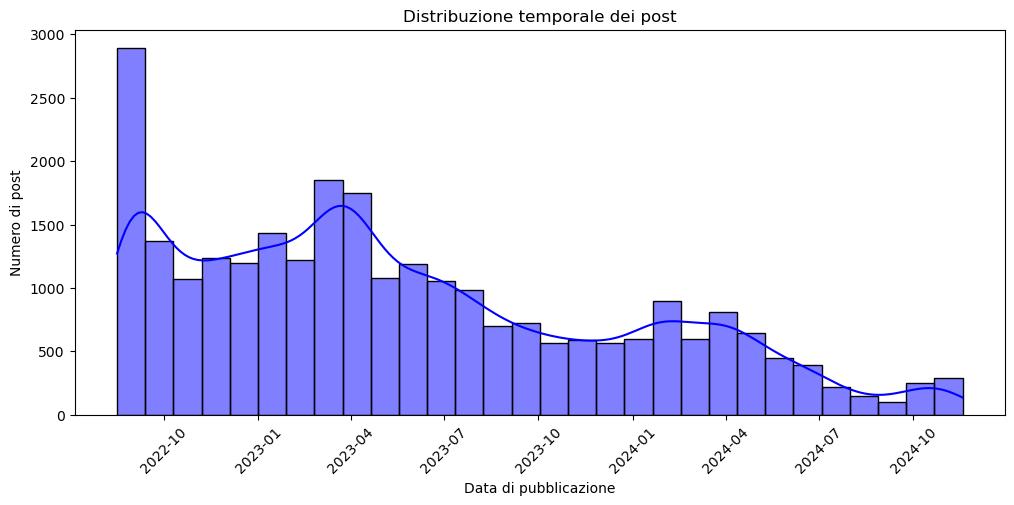

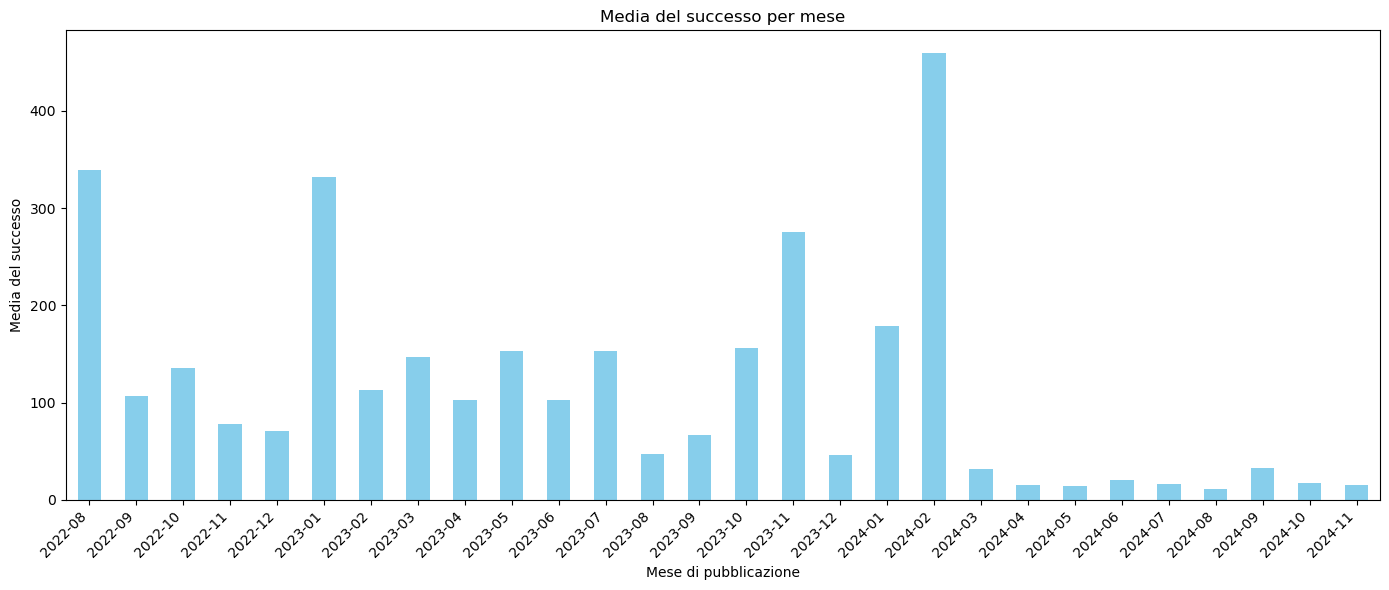

<Figure size 1400x600 with 0 Axes>

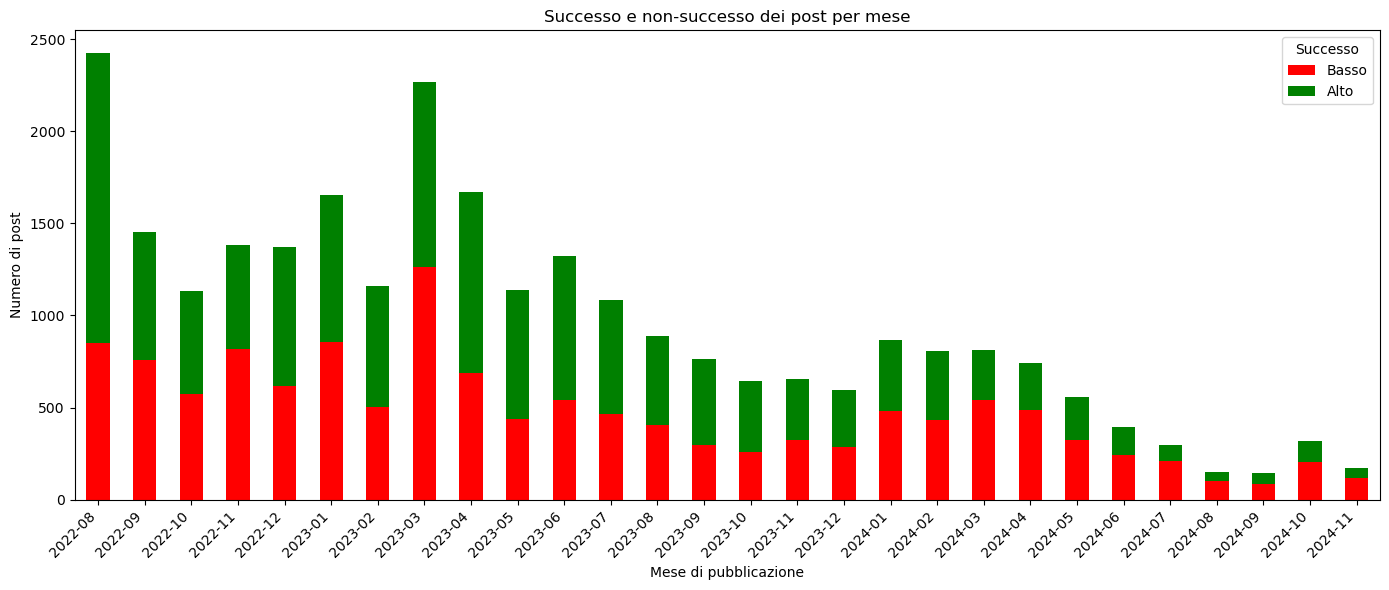


Media del successo per mese:
year_month
2022-08    339.230777
2022-09    106.724958
2022-10    135.250194
2022-11     77.904315
2022-12     70.739381
2023-01    332.538697
2023-02    112.601087
2023-03    146.728217
2023-04    102.836355
2023-05    153.507990
2023-06    102.262513
2023-07    152.528575
2023-08     46.654567
2023-09     67.087369
2023-10    156.212960
2023-11    275.017062
2023-12     46.486009
2024-01    178.953189
2024-02    459.999902
2024-03     32.126748
2024-04     14.979910
2024-05     14.411784
2024-06     19.917212
2024-07     15.730425
2024-08     10.594086
2024-09     32.903150
2024-10     16.880789
2024-11     15.013324
Freq: M, Name: Success, dtype: float64


In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creiamo una nuova colonna 'publication_date' scegliendo la data più affidabile
df['publication_date'] = pd.to_datetime(df['created_date'], errors='coerce')  # Prima proviamo con created_date
df.loc[df['publication_date'].isna(), 'publication_date'] = pd.to_datetime(df['timestamp'], unit='s')

# Ordiniamo per data
df = df.sort_values(by='publication_date')

# Creiamo il grafico della distribuzione dei post nel tempo
plt.figure(figsize=(12, 5))
sns.histplot(df['publication_date'], bins=30, kde=True, color='blue')
plt.xlabel("Data di pubblicazione")
plt.ylabel("Numero di post")
plt.title("Distribuzione temporale dei post")
plt.xticks(rotation=45)
plt.show()

# Grafico a barre per il successo medio mensile
success_per_month = df.groupby(df['publication_date'].dt.to_period('M'))['Success'].mean()
plt.figure(figsize=(14, 6))
success_per_month.plot(kind='bar', color='skyblue')
plt.xlabel("Mese di pubblicazione")
plt.ylabel("Media del successo")
plt.title("Media del successo per mese")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Raggruppiamo i dati per mese e per successo binario
grouped = df.groupby([df['publication_date'].dt.to_period('M'), 'SuccessBinary']).size().unstack(fill_value=0)

# Creiamo il grafico a barre impilate
plt.figure(figsize=(14, 6))
grouped.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(14, 6))
plt.xlabel("Mese di pubblicazione")
plt.ylabel("Numero di post")
plt.title("Successo e non-successo dei post per mese")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Successo", labels=["Basso", "Alto"])
plt.tight_layout()
plt.show()

# Analisi testuale: vediamo il numero di post per mese
df['year_month'] = df['publication_date'].dt.to_period('M')
success_per_month = df.groupby('year_month')['Success'].mean()

print("\nMedia del successo per mese:")
print(success_per_month)

<h2>Estraggo come feature relativa al tempo il numero di giorni trascorsi dalla created_date, per usarla in futuro come feature. Lascio qua sotto il codice che poi vado a copia-incollare volta volta per considerare la feature aggiunta</h2>

In [100]:
df['days_since_epoch'] = (pd.to_datetime(df['created_date']) - pd.Timestamp('1970-01-01')) // pd.Timedelta(days=1)
df

,Writing NFT,Author Homepage,Total Sold(ETH),Total Sold Numbers,Total Buyers,Price(ETH),nft_address,collection,fees,created_date,link,digest,transaction_id,body,timestamp,title,year,month,day,weekday,cleaned_text,language,cleaned_body,cleaned_title,processed_cleaned_text,cleaned_text_tokenized,cleaned_text_lemmatized,cleaned_text_POS,cleaned_text_sentiment,words_body,words_title,words_text,normalized_tfidf_sum,topic,nft,web3,community,blockchain,crypto,wallet,chain,verbs_density,adjectives_density,nouns_density,Kincaid,FleschReadingEase,GunningFogIndex,characters_per_word,syll_per_word,words_per_sentence,sentences_per_paragraph,type_token_ratio,characters,syllables,words,wordtypes,sentences,paragraphs,long_words,complex_words,"topic_T1: Gaming, Virtual Worlds & Characters","topic_T2: Wallets, Airdrops & Ethereum Tools","topic_T3: Web3, Blockchain & Digital Platforms","topic_T4: DeFi, Market Strategies & Liquidity","topic_T5: Blockchain, Transactions & Smart Contracts","topic_T6: Web3 Launches, Rewards & Creators","topic_T7: Human Thoughts, Emotions & Reflections",Success,SuccessBinary,publication_date,year_month,days_since_epoch
193,https://opensea.io/assets/optimism/0x26bbb507d...,https://mirror.xyz/0xf4cdb62c9a66c749cdf736c43...,0.5900,59,53,0.0100,0x26bbb507daa7c0dec6a578a09f0d7ac85ff6fec5,man1f3st0,"[2.5, 10.0]",2022-08-16,https://mirror.xyz/10/0x26bbb507daa7c0dec6a578...,U78R96tWuoKaVIPweiQyWf0LalcYdC6y1son3RwzClY,1ha_Xp7c-LF6eNkXmUEQ31xWuJRkQkgG__E7Ai3oVZg,![WILL YOU SUPPORT](https://images.mirror-medi...,1.658839e+09,MAN1F3ST0,2022,8,16,Tuesday,man1f3st0 support first ever decentralized aut...,en,support first ever decentralized automated tok...,man1f3st0,"{'tokens': ['man1f3st0', 'support', 'first', '...","['man1f3st0', 'support', 'first', 'ever', 'dec...","['man1f3st0', 'support', 'first', 'ever', 'dec...","[('man1f3st0', 'NUM'), ('support', 'NOUN'), ('...",0.250000,34,1,35,0.091954,"T6: Web3 Launches, Rewards & Creators",0,0,1,0,0,0,0,0.200000,0.142857,0.514286,150.195000,-979.087500,20.600000,75.444444,14.000000,1.500000,0.923077,0.944444,1358.0,252.0,18.0,17.0,12.0,13.0,14.0,9.0,0,0,0,0,0,1,0,1092.592593,1,2022-08-16,2022-08,19220
6727,https://opensea.io/assets/optimism/0xfcba4d13f...,https://mirror.xyz/0x0287132a8c92e811d94e461b0...,0.0001,1,1,0.0001,0xfcba4d13fa7e4933ebf709f26d20423e5fb38f03,token-of-wealth,"[2.5, 10.0]",2022-08-16,https://mirror.xyz/10/0xfcba4d13fa7e4933ebf709...,0Dm9P5xKNXdflcw9e5MJ2fiAuw1bVQGZwF-XJRb_s0Q,AgJcTRZFxoRPNFCxv0dAc95r307THtmJabOZ6EynHpY,I am wealthy,1.660675e+09,Token of Wealth,2022,8,16,Tuesday,token wealth wealthy,en,wealthy,token wealth,"{'tokens': ['token', 'wealth', 'wealthy'], 'le...","['token', 'wealth', 'wealthy']","['token', 'wealth', 'wealthy']","[('token', 'ADJ'), ('wealth', 'NOUN'), ('wealt...",0.500000,1,2,3,1.000000,"T1: Gaming, Virtual Worlds & Characters",0,0,0,0,0,0,0,0.000000,0.666667,0.333333,-2.620000,119.190000,1.200000,3.333333,1.000000,3.000000,1.000000,1.000000,10.0,3.0,3.0,3.0,1.0,1.0,1.0,0.0,1,0,0,0,0,0,0,5.000000,0,2022-08-16,2022-08,19220
3220,https://opensea.io/assets/optimism/0xe6d34d7f3...,https://mirror.xyz/0x3f9da1a56fac7efae92c84c90...,0.0050,1,1,0.0050,0xe6d34d7f3c34f6d90e311e302ce160b5214c2ba0,coinslist-airdrop-nft,"[2.5, 10.0]",2022-08-16,https://mirror.xyz/10/0xe6d34d7f3c34f6d90e311e...,OMwWTTAcbRafDIJ-S4kuG7rW6ivHv1nT9gj_BYUf2uc,CUn0bAXGY_vGmHG3DjhaRrwPbPgYp_oAg_19IA5e7Jk,Early release Coinslist airdrop NFT,1.660689e+09,Coinslist Airdrop NFT,2022,8,16,Tuesday,coinslist airdrop nft early release coinslist ...,en,early release coinslist airdrop nft,coinslist airdrop nft,"{'tokens': ['coinslist', 'airdrop', 'nft', 'ea...","['coinslist', 'airdrop', 'nft', 'early', 'rele...","['coinslist', 'airdrop', 'nft', 'early', 'rele...","[('coinslist', 'PROPN'), ('airdrop', 'PROPN'),...",0.100000,5,3,8,0.369165,"T6: Web3 Launches, Rewards & Creators",1,0,0,0,0,0,0,0.000000,0.125000,0.250000,5.240000,66.400000,2.000000,6.200000,1.600000,5.000000,1.000000,1.0000

In [102]:
df.to_csv('mirrorPublications_lastest.csv', index=False)